In [4]:
#import
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt
%matplotlib inline

#set figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#normalise
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read file
df = pd.read_csv("BTC_DATA.csv")

#print head
df.head(10)
df.tail()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
2086,BTC,2019-06-25T22:59:58.000Z,11665.409684,10996.453282,11704.621896,10951.025020
2087,BTC,2019-06-26T22:59:59.000Z,12444.925860,11668.665857,13879.237706,11625.881090
2088,BTC,2019-06-27T23:00:00.000Z,11086.268829,12444.922343,13328.580313,10314.753873
2089,BTC,2019-06-28T23:00:00.000Z,12316.953012,11086.235715,12402.043512,10789.984140
2090,BTC,2019-06-29T22:59:59.000Z,12024.080972,12360.187098,12381.041702,11368.274496


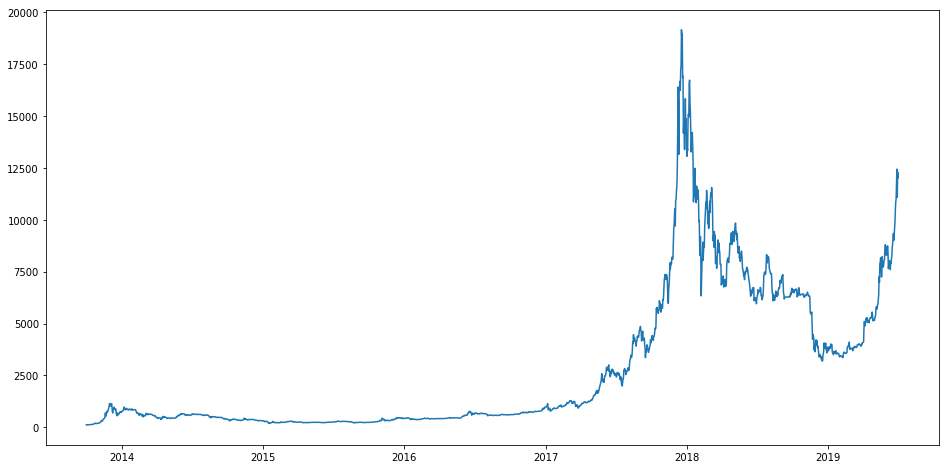

In [7]:
#set date as index
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16, 8))
plt.plot(df['Closing Price (USD)'], label="Close price history")